In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.mixture import GaussianMixture
import pandas as pd
import matplotlib.pyplot as plt
import scipy

# Загружаем данные из Excel файла
file_path = "/content/sera 29.05.xlsx"  # Укажите путь к вашему Excel файлу
data = pd.read_excel(file_path)
data



,spectrs,S0,S1,S2
0,390.04,0.052831,0.047009,0.045852
1,392.07,0.053586,0.047590,0.046344
2,394.09,0.054415,0.048204,0.046893
3,396.12,0.055367,0.048878,0.047519
4,398.14,0.056485,0.049714,0.048334
...,...,...,...,...
295,1022.17,0.378983,0.408237,0.422747
296,1024.43,0.373243,0.402555,0.416631
297,1026.70,0.368093,0.397339,0.411408
298,1028.96,0.363125,0.392523,0.405883


In [ ]:
# Выбираем столбец для кластеризации (замените "ColumnName" на название вашего столбца)
column_name = "S0"
values = data[column_name].dropna()  # Убираем пропуски, если они есть
column_name1 = "S1"
values1 = data[column_name1].dropna()
column_name2 = "S2"
values2 = data[column_name2].dropna()

# # Преобразуем данные в массив numpy
X = values.values.reshape(-1, 1)
Y = values1.values.reshape(-1, 1)
Z = values2.values.reshape(-1, 1)
# # Инициализируем модель K-средних (например, с 3 кластерами)
n_components = 3
gmm = GaussianMixture(n_components = n_components, random_state=42)
modelX = gmm.fit_predict(X)
modelY = gmm.fit_predict(Y)
modelZ = gmm.fit_predict(Z)

# # # Получаем метки кластеров
# labelsX = modelX.labels
# labelsY = modelY.labels
# labelsZ = modelZ.labels

data['labels_S0'] = modelX
data['label_S1'] = modelY
data['labels_S2'] = modelZ



In [ ]:
# Выбираем столбец для кластеризации (замените "ColumnName" на название вашего столбца)
column_name = "S0"
values = data[column_name].dropna()  # Убираем пропуски, если они есть
column_name1 = "S1"
values1 = data[column_name1].dropna()
column_name2 = "S2"
values2 = data[column_name2].dropna()

# # Преобразуем данные в массив numpy
X = values.values.reshape(-1, 1)
Y = values1.values.reshape(-1, 1)
Z = values2.values.reshape(-1, 1)
# # Инициализируем модель K-средних (например, с 3 кластерами)
n_components = 3
gmm = KMeans(n_clusters = n_components, random_state=42)
modelX = gmm.fit_predict(X)
modelY = gmm.fit_predict(Y)
modelZ = gmm.fit_predict(Z)

# # # Получаем метки кластеров
# labelsX = modelX.labels
# labelsY = modelY.labels
# labelsZ = modelZ.labels

data['labels_S0'] = modelX
data['label_S1'] = modelY
data['labels_S2'] = modelZ

In [ ]:
data

,spectrs,S0,S1,S2,labels S0,labels S1,labels S2
0,390.04,0.052831,0.047009,0.045852,2,2,2
1,392.07,0.053586,0.047590,0.046344,2,2,2
2,394.09,0.054415,0.048204,0.046893,2,2,2
3,396.12,0.055367,0.048878,0.047519,2,2,2
4,398.14,0.056485,0.049714,0.048334,2,2,2
...,...,...,...,...,...,...,...
295,1022.17,0.378983,0.408237,0.422747,1,1,1
296,1024.43,0.373243,0.402555,0.416631,1,1,1
297,1026.70,0.368093,0.397339,0.411408,1,1,1
298,1028.96,0.363125,0.392523,0.405883,1,1,1


<ipython-input-53-8c45d000e0de>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(data['spectrs'], data['labels_S0'], s=40, cmap='viridis')


Text(0.5, 1.0, 'GMM Clustering')

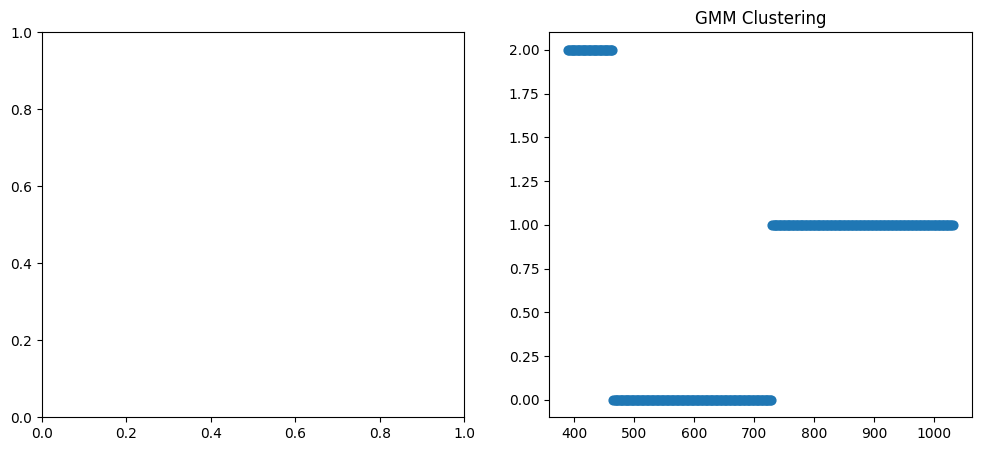

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax2.scatter(data['spectrs'], data['labels_S0'], s=40, cmap='viridis')
ax2.set_title("GMM Clustering")

In [ ]:
data.to_excel('result_seragmm5.xlsx', index= False )